In [1]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd

import simulation

In [14]:
pop_params = [0.2, 0.5, 0.8]
pl_params = [1, 1.5, 2]
param_sweep = list(itertools.product(pop_params, pl_params))

In [15]:
results = []
for pair in param_sweep:
    pop = pair[0]
    pl = pair[1]
    sim = simulation.Simulation(300, 100_000, 12, pop, pl)
    sim.init_simulation()
    sim.run_simulation()
    mean_churn = sim._calculate_churn(sim.top_ten)
    results.append({'pop': pop, 'pl': pl, 'churn': mean_churn})    

 17%|█▋        | 2/12 [00:10<00:51,  5.16s/it]

In [3]:
sim = simulation.Simulation(300, 100_000, 12, 0.8, 2)

In [4]:
sim.init_simulation()

In [5]:
sim.run_simulation()

100%|██████████| 12/12 [01:13<00:00,  6.15s/it]


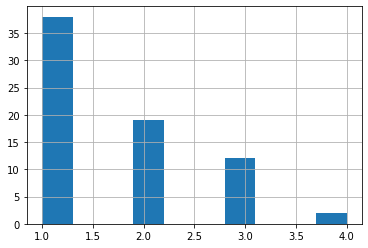

In [8]:
cumulative_weeks = sim.top_ten.groupby('movie').nunique()['iteration'].hist()


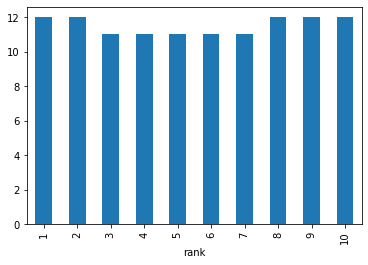

In [9]:
rank_occupants = sim.top_ten.groupby('rank').nunique()['movie'].plot(kind='bar')

In [12]:
mean_churn = sim._calculate_churn(sim.top_ten)
mean_churn

5.818181818181818

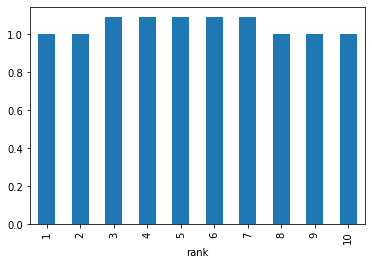

In [13]:
rank_stickiness = sim.top_ten.groupby(['movie', 'rank']).count().groupby(level=1).mean().iteration.plot(kind='bar')